In [7]:
from sympy import *
init_printing()

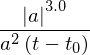

In [63]:
x, y = symbols('x y', cls=Function)
R = ((x(t).diff(t)**2 + y(t).diff(t)**2)**(3/2) \
     / (x(t).diff(t)*y(t).diff(t, 2) - y(t).diff(t)*x(t).diff(t,2)))

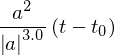

In [156]:
a, b, t, t0 = symbols('a b t t0', real=True)
x0 = symbols('x0', real=True)
X = a*sqrt(pi)*fresnelc((t-t0)/sqrt(pi))
Y = a*sqrt(pi)*fresnels((t-t0)/sqrt(pi))

#plotting.plot_parametric(x.subs(d), y.subs(d), (t, 0, 1))

#K = (t-t0)/a
K = 1 / R.subs({x(t): X, y(t): Y}).doit().simplify()
display(K)
L = sqrt(a**2)*(t)

In [143]:
L = integrate(sqrt(X.diff(t)**2 + Y.diff(t)**2), (t, 0, b)).simplify()
display(L)

In [159]:
k0, k1, l = symbols('k0 k1 l', real=True)

sn = solve([
    Eq(K.subs(t, 0), k0),
    Eq(K.subs(t, b), k1),
    Eq(L, l),
], (a, t0), dict=True)
display(sn)

In [152]:
sn[0][b].subs(d)

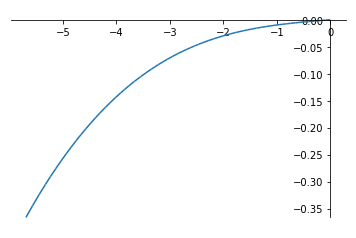

In [153]:
th = symbols('theta')
d = {
    k0: 0.0,
    k1: 5.9114369622925669e-02,
    l: 5.7125709578755304e+00,
    
    'x': 34.008391843292344e+00,
    'y': -4.3421826556979193e+00,
    th: 7.9998293398872988e-03,
    
    'x2': 39.707082592335631e+00,
    'y2': -4.6174670591660050e+00,
    'hdg2': -1.6084768620939371e-01,
}

xy = Matrix([
    [(X - X.subs(t, 0)).simplify()],
    [(Y - Y.subs(t, 0)).simplify()]
])

rot = Matrix([[cos(th), -sin(th)], [sin(th), cos(th)]])
curv = (rot * xy)

plotting.plot_parametric(
    curv[0].subs(sn[0]).subs(d),
    curv[1].subs(sn[0]).subs(d),
    (t, 0, sn[0][b].subs(d))
)

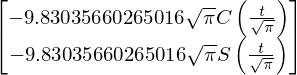

In [154]:
xy.subs(sn[0]).subs(d)